<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Python_Fuzzy_S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_defuzzify.html

##Defuzzification

Fuzzy logic calculations are excellent tools, but to use them the fuzzy result<br> must be converted back into a single number. This is known as defuzzification.

There are several possible methods for defuzzification, exposed via skfuzzy.defuzz.

In [ ]:
%%capture
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzzy

### Generate trapezoidal membership function on range [0, 1]

In [ ]:

x = np.arange(0, 5.05, 0.1)
mfx = fuzzy.trapmf(x, [2, 2.5, 3, 4.5])


In [ ]:
mfx.view()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2       , 0.4       , 0.6       , 0.8       ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.93333333, 0.86666667, 0.8       , 0.73333333,
       0.66666667, 0.6       , 0.53333333, 0.46666667, 0.4       ,
       0.33333333, 0.26666667, 0.2       , 0.13333333, 0.06666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

### Defuzzify this membership function five ways

In [ ]:
defuzz_centroid = fuzzy.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzzy.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzzy.defuzz(x, mfx, 'mom')
defuzz_som = fuzzy.defuzz(x, mfx, 'som')
defuzz_lom = fuzzy.defuzz(x, mfx, 'lom')

In [ ]:

names = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]

for name in names:
  print(name)


3.0555555555555554
3.0
2.75
2.5
3.0


### Collect info for vertical lines

In [ ]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzzy.interp_membership(x, mfx, i) for i in xvals]

print('ymax  =', ymax)
print('xvals =', xvals)

ymax  = [0.962962962962963, 1.0, 1.0, 1.0, 1.0]
xvals = [3.0555555555555554, 3.0, 2.75, 2.5, 3.0]


### Display and compare defuzzification results against membership function

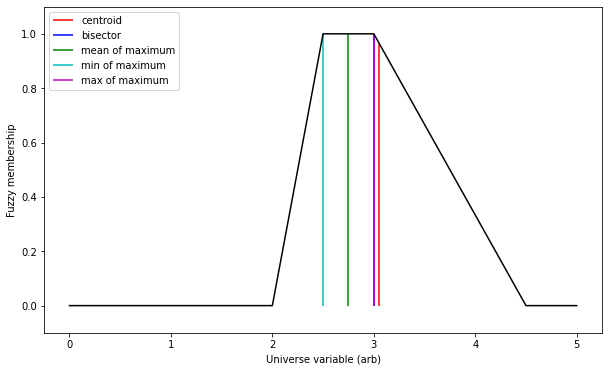

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
def f(number):
  plt.figure(figsize=(10, 6))

  plt.plot(x, mfx, 'k')
  for xv, y, label, color in zip(xvals, ymax, labels, colors):
      plt.vlines(xv, 0, y, label=label, color=color)
  plt.ylabel('Fuzzy membership')
  plt.xlabel('Universe variable (arb)')
  plt.ylim(-0.1, 1.1)
  plt.legend(loc=2)
  plt.vlines(number, 0, 1, colors='k', linestyles='dashed')

  plt.show()
   # return number

In [ ]:
interact(f, number=(1,5.0,0.1))

interactive(children=(FloatSlider(value=3.0, description='number', max=5.0, min=1.0), Output()), _dom_classes=…

<function __main__.f>